### Corchea_DiscAnalyze use example

#### This example show how to use Corchea_DiscAnalyze to extract data from Corchea in different positions so you can move Corchea during the experiment to do things like pulse induction. For now you need to group your images by fixed position and give them sequentially to the algorithm. In future this can be automated, position will be infered and time extracted from file name.

In [1]:
import os
import glob

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import ndimage as ndi
from scipy import stats

from skimage import io
from skimage.util import img_as_ubyte
from skimage.exposure import histogram
from skimage.filters import sobel
from skimage.morphology import watershed
from skimage.feature import canny
from skimage.draw import circle
#sns.set()

In [2]:
img_dir = "/Users/gonzalovidal/Gonzalo/Synthetic Biology/Corchea/rgh1/T1" # Enter Directory of all images in the first position
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort()
data = []
for f1 in files:
    imraw = io.imread(f1)
    data.append(imraw)
np_data = np.array(data)
np_data.shape

(24, 720, 960, 3)

#### Select  mask parameters

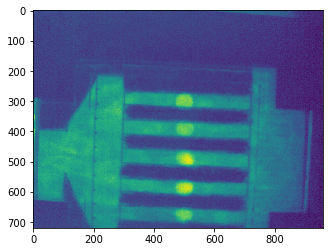

In [3]:
mask_channel = 1
mask_time = 20
im = np_data[mask_time,:,:,mask_channel]
#Obtain the channel as ubyte
image = img_as_ubyte(im)
plt.imshow(image)

#### MASK Segmentation algorithm

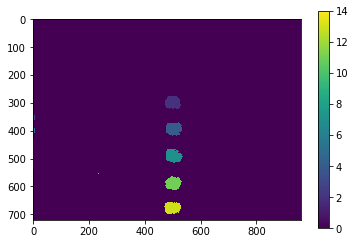

In [4]:
hist, hist_centers = histogram(im)
edges = canny(im/255.)
fill_im = ndi.binary_fill_holes(edges) 
label_objects, nb_labels = ndi.label(edges)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 1
mask_sizes[0] = 0
im_cleaned = mask_sizes[label_objects]
markers = np.zeros_like(im)
markers[im < 25] = 1
markers[im > 35] = 2
elevation_map = sobel(im)
markers = np.zeros_like(im) 
markers[im < 23] = 1
markers[im > 35] = 2
segmentation = watershed(elevation_map, markers)
segmentation = ndi.binary_fill_holes(segmentation - 1)
labeled_discs, _ = ndi.label(segmentation)
plt.imshow(labeled_discs)
plt.colorbar()

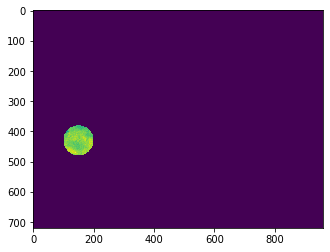

In [5]:
bgcircle = np.zeros((image.shape), dtype=np.uint8)
rr, cc = circle(430, 150, 50) #X, Y, r
bgcircle[rr, cc] = 1
areabg = np.sum(bgcircle)
plt.imshow(bgcircle*np_data[1,:,:,1])

#### Create Corchea_df and set the time

In [6]:
columns = {'Time':[],'Sample':[],'Value':[],'Name':[]}
Corchea_df = pd.DataFrame(columns)
time = np_data.shape[0]
Corchea_df

,Time,Sample,Value,Name


In [7]:
for t in range(time):   
    for disc in range(1,6): #the complement is the disc 0
        sample = labeled_discs==disc
        area = np.sum(sample)#quit this from for loop and put calculate only 1 time
        rbgfluo = np.sum(bgcircle*np_data[t,:,:,0])
        ravbgfluo = rbgfluo/areabg
        gbgfluo = np.sum(bgcircle*np_data[t,:,:,1])
        gavbgfluo = gbgfluo/areabg
        rfluo = np.sum(sample*np_data[t,:,:,0])
        ravfluo = (rfluo/area)-ravbgfluo
        gfluo = np.sum(sample*np_data[t,:,:,1])
        gavfluo = (gfluo/area)-gavbgfluo
        
        d_fluo_av_r = {'Time':t,'Sample':disc,'Value':ravfluo,'Name':'RFP'}
        pd_fluo_av_r = pd.DataFrame([d_fluo_av_r])
        d_fluo_av_g = {'Time':t,'Sample':disc,'Value':gavfluo,'Name':'GFP'}
        pd_fluo_av_g = pd.DataFrame([d_fluo_av_g])
        
        Corchea_df = Corchea_df.append(pd_fluo_av_r,ignore_index=True )
        Corchea_df = Corchea_df.append(pd_fluo_av_g,ignore_index=True )
Corchea_df

,Time,Sample,Value,Name
0,0.0,1.0,5.749649,RFP
1,0.0,1.0,3.085240,GFP
2,0.0,2.0,1.552095,RFP
3,0.0,2.0,3.701914,GFP
4,0.0,3.0,4.288110,RFP
...,...,...,...,...
235,23.0,3.0,5.680877,GFP
236,23.0,4.0,2.697509,RFP
237,23.0,4.0,5.646980,GFP
238,23.0,5.0,4.499726,RFP


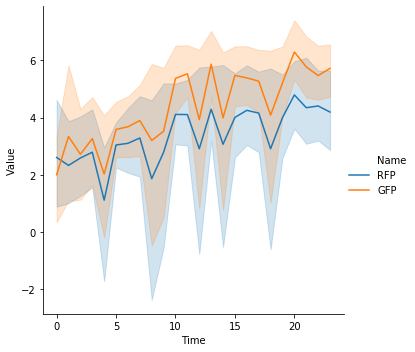

In [8]:
sns.relplot(x="Time", y="Value",
            hue="Name",
            kind="line", data=Corchea_df); #, col="Sample"
#plt.ylim([0,30])

In [9]:
img_dir = "/Users/gonzalovidal/Gonzalo/Synthetic Biology/Corchea/rgh1/T2" # Enter Directory of all images in the second position
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort()
data = []
for f1 in files:
    imraw = io.imread(f1)
    data.append(imraw)
np_data = np.array(data)
np_data.shape

(41, 720, 960, 3)

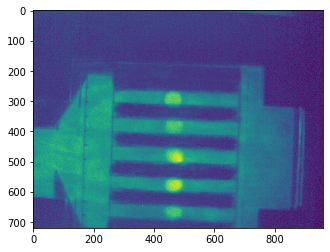

In [10]:
mask_channel = 1
mask_time = 20
im = np_data[mask_time,:,:,mask_channel]
#Obtain the channel as ubyte
image = img_as_ubyte(im)
plt.imshow(image)

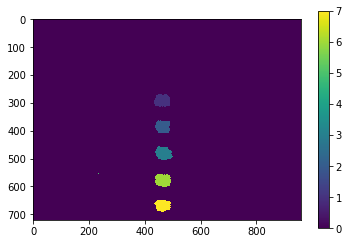

In [11]:
hist, hist_centers = histogram(im)
edges = canny(im/255.)
fill_im = ndi.binary_fill_holes(edges) 
label_objects, nb_labels = ndi.label(edges)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 1
mask_sizes[0] = 0
im_cleaned = mask_sizes[label_objects]
markers = np.zeros_like(im)
markers[im < 20] = 1
markers[im > 37] = 2
elevation_map = sobel(im)
markers = np.zeros_like(im) 
markers[im < 25] = 1
markers[im > 37] = 2
segmentation = watershed(elevation_map, markers)
segmentation = ndi.binary_fill_holes(segmentation - 1)
labeled_discs, _ = ndi.label(segmentation)
plt.imshow(labeled_discs)
plt.colorbar()

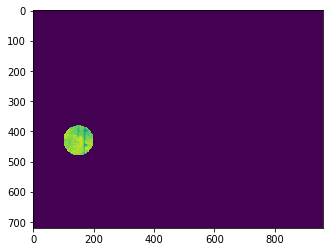

In [12]:
bgcircle = np.zeros((image.shape), dtype=np.uint8)
rr, cc = circle(430, 150, 50)
bgcircle[rr, cc] = 1
areabg = np.sum(bgcircle)
plt.imshow(bgcircle*np_data[1,:,:,1])

In [13]:
time = np_data.shape[0]
for t in range(time):   
    for disc in range(1,6): #do not take the first mask
        sample = labeled_discs==disc
        area = np.sum(sample)#quit this from for loop and put calculate only 1 time
        rbgfluo = np.sum(bgcircle*np_data[t,:,:,0])
        ravbgfluo = rbgfluo/areabg
        gbgfluo = np.sum(bgcircle*np_data[t,:,:,1])
        gavbgfluo = gbgfluo/areabg
        rfluo = np.sum(sample*np_data[t,:,:,0])
        ravfluo = (rfluo/area)-ravbgfluo
        gfluo = np.sum(sample*np_data[t,:,:,1])
        gavfluo = (gfluo/area)-gavbgfluo
        
        d_fluo_av_r = {'Time':t+24,'Sample':disc,'Value':ravfluo,'Name':'RFP'}
        pd_fluo_av_r = pd.DataFrame([d_fluo_av_r])
        d_fluo_av_g = {'Time':t+24,'Sample':disc,'Value':gavfluo,'Name':'GFP'}
        pd_fluo_av_g = pd.DataFrame([d_fluo_av_g])
        
        Corchea_df = Corchea_df.append(pd_fluo_av_r,ignore_index=True )
        Corchea_df = Corchea_df.append(pd_fluo_av_g,ignore_index=True )
Corchea_df

,Time,Sample,Value,Name
0,0.0,1.0,5.749649,RFP
1,0.0,1.0,3.085240,GFP
2,0.0,2.0,1.552095,RFP
3,0.0,2.0,3.701914,GFP
4,0.0,3.0,4.288110,RFP
...,...,...,...,...
645,64.0,3.0,13.593337,GFP
646,64.0,4.0,1.821853,RFP
647,64.0,4.0,5.666581,GFP
648,64.0,5.0,1.821853,RFP


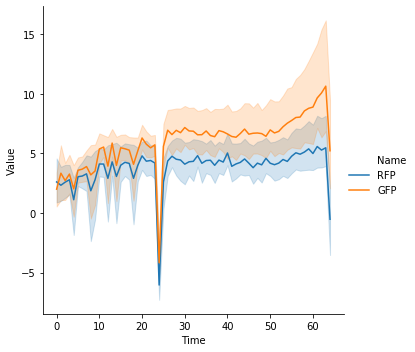

In [14]:
sns.relplot(x="Time", y="Value",
            hue="Name",
            kind="line", data=Corchea_df); #, col="Sample"

In [15]:
img_dir = "/Users/gonzalovidal/Gonzalo/Synthetic Biology/Corchea/rgh1/T3" # Enter Directory of all images in the first position
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort()
data = []
for f1 in files:
    imraw = io.imread(f1)
    data.append(imraw)
np_data = np.array(data)

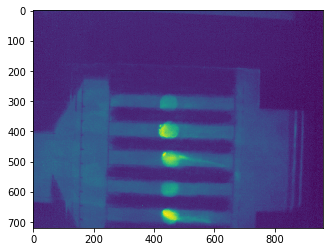

In [16]:
mask_channel = 1
mask_time = 10
im = np_data[mask_time,:,:,mask_channel]
#Obtain the channel as ubyte
image = img_as_ubyte(im)
plt.imshow(image)

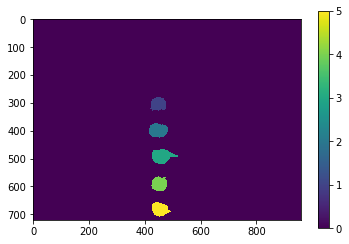

In [17]:
hist, hist_centers = histogram(im)
edges = canny(im/255.)
fill_im = ndi.binary_fill_holes(edges) 
label_objects, nb_labels = ndi.label(edges)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 1
mask_sizes[0] = 0
im_cleaned = mask_sizes[label_objects]
markers = np.zeros_like(im)
markers[im < 15] = 1
markers[im > 60] = 2
elevation_map = sobel(im)
markers = np.zeros_like(im) 
markers[im < 15] = 1
markers[im > 50] = 2
segmentation = watershed(elevation_map, markers)
segmentation = ndi.binary_fill_holes(segmentation - 1)
labeled_discs, _ = ndi.label(segmentation)
plt.imshow(labeled_discs)
plt.colorbar()

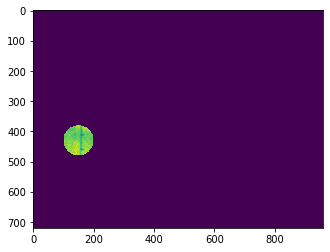

In [18]:
bgcircle = np.zeros((image.shape), dtype=np.uint8)
rr, cc = circle(430, 150, 50)
bgcircle[rr, cc] = 1
areabg = np.sum(bgcircle)
plt.imshow(bgcircle*np_data[1,:,:,1])

In [19]:
time = np_data.shape[0]
for t in range(time):   
    for disc in range(1,6): #the complement is the disc 0
        sample = labeled_discs==disc
        area = np.sum(sample)#quit this from for loop and put calculate only 1 time
        rbgfluo = np.sum(bgcircle*np_data[t,:,:,0])
        ravbgfluo = rbgfluo/areabg
        gbgfluo = np.sum(bgcircle*np_data[t,:,:,1])
        gavbgfluo = gbgfluo/areabg
        rfluo = np.sum(sample*np_data[t,:,:,0])
        ravfluo = (rfluo/area)-ravbgfluo
        gfluo = np.sum(sample*np_data[t,:,:,1])
        gavfluo = (gfluo/area)-gavbgfluo
        
        d_fluo_av_r = {'Time':t+64,'Sample':disc,'Value':ravfluo,'Name':'RFP'}
        pd_fluo_av_r = pd.DataFrame([d_fluo_av_r])
        d_fluo_av_g = {'Time':t+64,'Sample':disc,'Value':gavfluo,'Name':'GFP'}
        pd_fluo_av_g = pd.DataFrame([d_fluo_av_g])
        
        Corchea_df = Corchea_df.append(pd_fluo_av_r,ignore_index=True )
        Corchea_df = Corchea_df.append(pd_fluo_av_g,ignore_index=True )
Corchea_df

,Time,Sample,Value,Name
0,0.0,1.0,5.749649,RFP
1,0.0,1.0,3.085240,GFP
2,0.0,2.0,1.552095,RFP
3,0.0,2.0,3.701914,GFP
4,0.0,3.0,4.288110,RFP
...,...,...,...,...
2345,233.0,3.0,89.303777,GFP
2346,233.0,4.0,42.185347,RFP
2347,233.0,4.0,87.506180,GFP
2348,233.0,5.0,40.274803,RFP


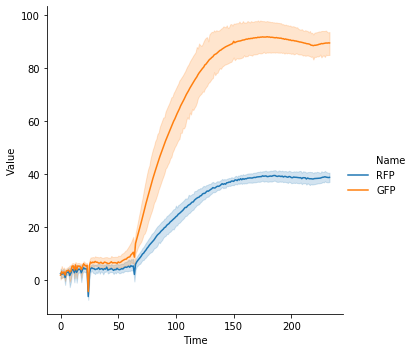

In [20]:
sns.relplot(x="Time", y="Value",
            hue="Name",
            kind="line", data=Corchea_df); #, col="Sample"

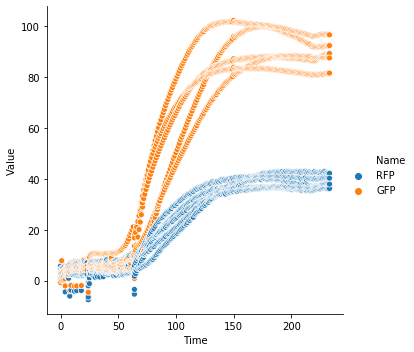

In [21]:
sns.relplot(x="Time", y="Value",
            hue="Name",
            kind="scatter", data=Corchea_df); #, col="Sample"

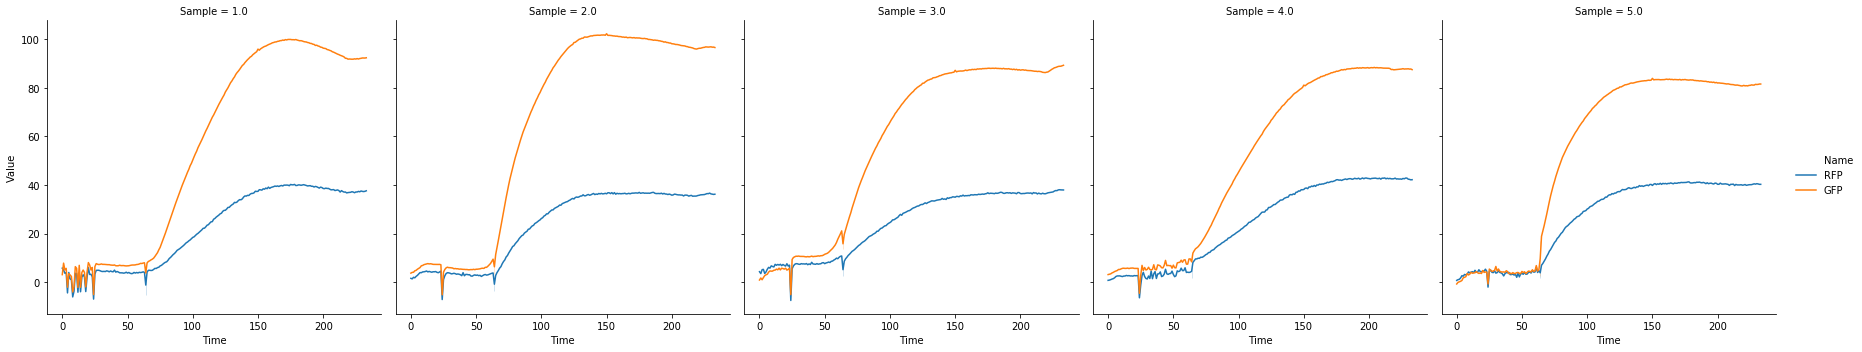

In [22]:
sns.relplot(x="Time", y="Value",
            hue="Name",  col="Sample",
            kind="line", data=Corchea_df); 

#### Work in progress, better mask presentation to aid user to choose tham better.